In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
big_alphabet = np.load("./data/big-alphabet_29x29_train-test-cv.npz")
big_alphabet.keys()

['test', 'train', 'cv']

In [4]:
from src.misc import transform_data

In [5]:
train_data = transform_data(big_alphabet["train"])
cv_data = transform_data(big_alphabet["cv"])
test_data = transform_data(big_alphabet["test"])

In [6]:
from src.NNMiniBatch import NNMiniBatch

In [7]:
from src.functions.activation_objs import IdentyFunc, TanhFunc, LogisticFunc, SoftmaxFunc, ReLuFunc
from src.functions.cost_objs import QuadraticCost, CrossEntropyCost, MulticlassCrossEntropyCost

In [8]:
#batch

In [9]:
sizes = [841, 100, 26]
activation_functions = [TanhFunc, LogisticFunc]
cost_function = CrossEntropyCost

In [10]:
nn = NNMiniBatch(sizes = sizes,
                 activation_functions = activation_functions,
                 cost_function = cost_function,
                 epochs = 1300,
                 eta = 1.2,
                 mini_batch_size = None,
                 mode = "batch",
                 stop_rate=0.001)

w_sizes [(100, 841), (26, 100)]
b_sizes [(1, 100), (1, 26)]


In [11]:
scores_diff, scores = nn.sgd(train_data, cv_data);

Epoch 658: 52 / 52 | 0.757381353464 | 0.000999058580688

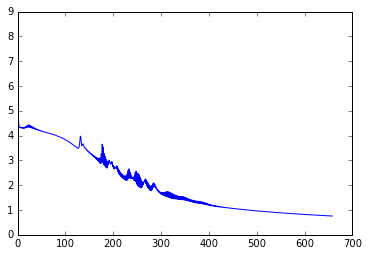

In [12]:
plt.plot(range(len(scores)), scores);

In [13]:
#online 

In [9]:
sizes = [841, 100, 26]
activation_functions = [TanhFunc, IdentyFunc]
cost_function = QuadraticCost

In [10]:
nn = NNMiniBatch(sizes = sizes,
                 activation_functions = activation_functions,
                 cost_function = cost_function,
                 epochs = 100,
                 eta = 0.04,
                 mini_batch_size = None,
                 mode = "online",
                 stop_rate=0.002)

w_sizes [(100, 841), (26, 100)]
b_sizes [(1, 100), (1, 26)]


In [11]:
scores_diff, scores = nn.sgd(train_data, cv_data);

Epoch 99: 52 / 52 | 0.0863713737618 | 0.00735689617357

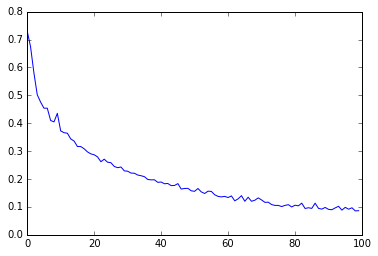

In [12]:
plt.plot(range(len(scores)), scores);

In [13]:
x_test, y_test = zip(*test_data)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [14]:
y_pred = np.argmax(nn.feedforward(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

In [15]:
np.sum(y_pred == y_true), len(y_true)

(51, 51)

In [76]:
import numpy as np

In [79]:
(np.sum(nn.z[1], axis=0)/np.float64(nn.z[1].shape[0])).shape

(100,)

In [21]:
# sf

In [42]:
sizes = [841, 100, 26]
activation_functions = [ReLuFunc, SoftmaxFunc]
cost_function = CrossEntropyCost

In [52]:
nn = NNMiniBatch(sizes = sizes,
                 activation_functions = activation_functions,
                 cost_function = cost_function,
                 epochs = 1000,
                 eta = 0.1,
                 mini_batch_size = None,
                 mode = "batch",
                 stop_rate=0)

w_sizes [(100, 841), (26, 100)]
b_sizes [(1, 100), (1, 26)]


In [53]:
scores_diff, scores = nn.sgd(train_data, cv_data);

Epoch 999: 50 / 52 | 3.49709788406 | 0.00143647747536

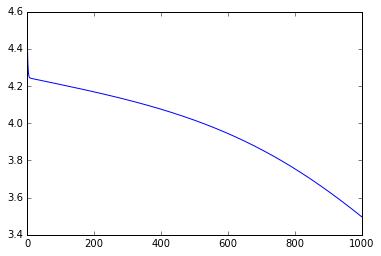

In [54]:
plt.plot(range(len(scores)), scores);

In [56]:
nn.z[-1]

array([[ 0.07980509,  0.03043239,  0.02432992, ...,  0.04829862,
         0.04026055,  0.03560971],
       [ 0.07587914,  0.03150162,  0.02613662, ...,  0.04644997,
         0.03942209,  0.03708407],
       [ 0.03362146,  0.0742263 ,  0.0437486 , ...,  0.03182203,
         0.02413692,  0.03759936],
       ..., 
       [ 0.04410659,  0.02086378,  0.02774495, ...,  0.04675966,
         0.06440346,  0.04461759],
       [ 0.03873603,  0.02722675,  0.03614035, ...,  0.04685887,
         0.05223186,  0.04573605],
       [ 0.04060562,  0.02658775,  0.03000956, ...,  0.04738729,
         0.05727309,  0.04122849]])